# Partie 1 : Les méthodes d'inférence statistique et le Bootstrap

In [1]:
%reset -f

import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.utils import resample 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 
import scipy.stats

In [2]:
#Fonctions utilisées dans cette partie 

#Fonction pour le biais estimé par le Boostrap
def Bias_B(L,theta):
    return np.mean(L)-theta

#Fonction pour le Erreur quadratique moyenne estimé par le Boostrap
def MSE_B(L,theta):
    B=len(L)
    res=0
    for b in range(0,B):
        res=(L[b]-theta)**2
    res=res/B
    
    return res

*** 
**Bootstrap paramétrique**
***

In [3]:
#Fonction pour pour simuler les echantillons de Boostrap 
def Bootstrap_simu_P(m, n, B):
    L=[]
    for b in range(B):
        X_etoile_b = np.random.exponential(scale=m, size=n)
        L.append(np.mean(X_etoile_b))
    return L

*** 
**Bootstrap non paramétrique**
***

In [4]:
#Fonction pour pour simuler les echantillons de Boostrap 
def Bootstrap_simu_NP(X, m, n, B):
    L=[]
    for b in range(B):
        X_etoile_b = random.choices(X, k=n)
        L.append(np.mean(X_etoile_b))
    return L

In [5]:
#donnees de simulations
n=10
m=20
#X = np.random.exponential(scale=m, size=n)
X=np.array([33.63091779, 14.53041422, 15.27989369, 33.69239659, 19.1372603 ,
       20.87346083,  4.52060521, 20.88196136, 53.9018562 , 41.45614484])

In [6]:
var=np.mean(X)
var

25.790491103

## Illustration du principe de **Monte-Carlo** :

### Nombre de Bootstrap : B=500

In [7]:
#Nombre de Boostrap concidere
B=500

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


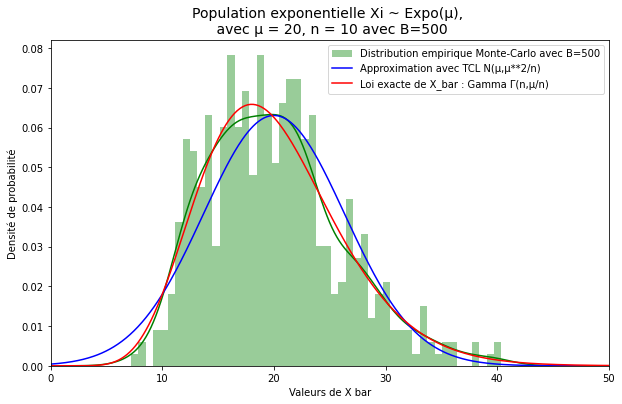

In [8]:
x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=m

y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_normal = scipy.stats.norm.pdf(x,mu,mu/np.sqrt(n))
L=Bootstrap_simu_P(mu, n, B)


plt.figure(figsize=(10,6))
sns.distplot(L, hist=True,color='g', bins=50,label='Distribution empirique Monte-Carlo avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ,µ**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X_bar : Gamma Γ(n,µ/n)')
plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

In [9]:
### Nombre de Bootstrap : B=5000

In [10]:
#Nombre de Boostrap concidere
B=5000

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


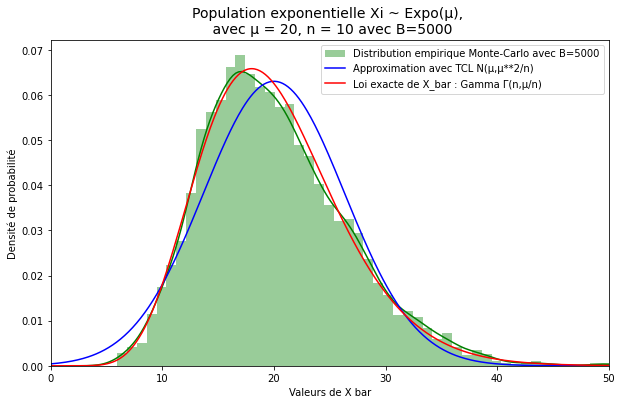

In [11]:
x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=m

y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_normal = scipy.stats.norm.pdf(x,mu,mu/np.sqrt(n))
L=Bootstrap_simu_P(mu, n, B)


plt.figure(figsize=(10,6))
sns.distplot(L, hist=True,color='g', bins=50,label='Distribution empirique Monte-Carlo avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ,µ**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X_bar : Gamma Γ(n,µ/n)')
plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

In [12]:
print("Le Bias est egale : ", Bias_B(L,m))
print("Le MSE est egale : ", MSE_B(L,m))

Le Bias est egale :  0.12087744348045248
Le MSE est egale :  0.0016984527346025366


In [ ]:
E=[]

x_B = [i for i in range(10,5000,20)]

Bias=[]
MSE=[]
for b in x_B:
    Bias.append(Bias_B(Bootstrap_simu_P(mu, n, b),mu))
    MSE.append(MSE_B(Bootstrap_simu_P(mu, n, b),mu))
    

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_B,Bias,'b', label='Estimation de Monte-Carlo du Bias')
plt.plot(x_B,MSE,'r', label='Estimation de Monte-Carlo du MSE')
plt.legend()
plt.ylabel("Estimations de Monte-Carlo")
plt.xlabel("Valeurs de B : Nombre de Bootstrap")
plt.title("Convergence du Bias et du MSE", fontsize=14)
plt.show()

## Illustration du principe de Bootstrap **parametrique** :

### Nombre de Bootstrap : B=500

In [ ]:
#Nombre de Boostrap concidere
B=500

In [ ]:
x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=np.mean(X)

y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_normal = scipy.stats.norm.pdf(x,mu,mu/np.sqrt(n))
y_gamma1 = scipy.stats.gamma.pdf(x,n,0,m/n)
L=Bootstrap_simu_P(mu, n, B)


plt.figure(figsize=(10,6))
sns.distplot(L, hist=True,color='g', bins=50,label='Distribution empirique Bootstrap paramterique avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ,µ**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X*_bar : Γ(n,µ_chapeau/n)')
plt.plot(x,y_gamma1,'.y', label='Loi exacte de X_bar : Gamma Γ(n,µ/n)')
plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

### Nombre de Bootstrap : B=5000

In [ ]:
#Nombre de Boostrap concidere
B=5000

In [ ]:
x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=np.mean(X)

y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_gamma1 = scipy.stats.gamma.pdf(x,n,0,m/n)
y_normal = scipy.stats.norm.pdf(x,mu,mu/np.sqrt(n))
L=Bootstrap_simu_P(mu, n, B)


plt.figure(figsize=(10,6))
sns.distplot(L, hist=True,color='g', bins=50,label='Distribution empirique Bootstrap parametrique avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ_chapeau,µ_chapeau**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X*_bar : Γ(n,µ_chapeau/n)')
plt.plot(x,y_gamma1,'.y', label='Loi exacte de X_bar : Gamma Γ(n,µ/n)')

plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

In [ ]:
print("Le Bias est egale : ", Bias_B(L,m))
print("Le MSE est egale : ", MSE_B(L,m))

In [ ]:
E=[]

x_B = [i for i in range(10,5000,20)]

Bias=[]
MSE=[]
for b in x_B:
    Bias.append(Bias_B(Bootstrap_simu_P(mu, n, b),mu))
    MSE.append(MSE_B(Bootstrap_simu_P(mu, n, b),mu))
    

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_B,Bias,'b', label='Estimation de Bootstrap du Bias')
plt.plot(x_B,MSE,'r', label='Estimation de Bootstrap du MSE')
plt.legend()
plt.ylabel("Estimations de Bootstrap")
plt.xlabel("Valeurs de B : Nombre de Bootstrap")
plt.title("Convergence du Bias et du MSE", fontsize=14)
plt.show()

## Illustration du principe de **Bootstrap non parametrique** :

### Nombre de Bootstrap : B=500

In [ ]:
#Nombre de Boostrap concidere
B=500

In [ ]:
x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=np.mean(X)
var=np.std(X)

mu=np.mean(X)
var=np.std(X)

y_normal = scipy.stats.norm.pdf(x,mu,var/np.sqrt(n))
L2=Bootstrap_simu_NP(X, mu, n, B)
y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_gamma1 = scipy.stats.gamma.pdf(x,n,0,m/n)



plt.figure(figsize=(10,6))
sns.distplot(L2, hist=True,color='g', bins=50,label='Distribution empirique Bootstrap non paramterique avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ_chapeau,var_chapeau**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X*_bar : Γ(n,µ_chapeau/n)')
plt.plot(x,y_gamma1,'.y', label='Loi exacte de X_bar : Γ(n,µ/n)')


plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

### Nombre de Bootstrap : B=5000

In [ ]:
#Nombre de Boostrap concidere
B=5000

In [ ]:
X = np.random.exponential(scale=m, size=n)

x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

mu=np.mean(X)
var=np.std(X)

y_normal = scipy.stats.norm.pdf(x,mu,var/np.sqrt(n))
L2=Bootstrap_simu_NP(X, mu, n, B)
y_gamma = scipy.stats.gamma.pdf(x,n,0,mu/n)
y_gamma1 = scipy.stats.gamma.pdf(x,n,0,m/n)



plt.figure(figsize=(10,6))
sns.distplot(L2, hist=True,color='g', bins=50,label='Distribution empirique Bootstrap non paramterique avec B='+str(B))
plt.plot(x,y_normal,'b', label='Approximation avec TCL N(µ_chapeau,var_chapeau**2/n)')
plt.plot(x,y_gamma,'r', label='Loi exacte de X*_bar : Γ(n,µ_chapeau/n)')
plt.plot(x,y_gamma1,'.y', label='Loi exacte de X_bar : Γ(n,µ/n)')


plt.legend()
plt.xlim((0,2.5*m))
plt.ylabel("Densité de probabilité")
plt.xlabel("Valeurs de X bar")
plt.title("Population exponentielle Xi ~ Expo(µ), \n avec µ = "+str(mu)+", n = "+str(n)+" avec B="+str(B), fontsize=14)
plt.show()

In [ ]:
print("Le Bias est egale : ", Bias_B(L2,m))
print("Le MSE est egale : ", MSE_B(L2,m))

In [ ]:
E=[]

x_B = [i for i in range(10,5000,20)]

Bias=[]
MSE=[]
for b in x_B:
    Bias.append(Bias_B(Bootstrap_simu_NP(X, mu, n, b),mu))
    MSE.append(MSE_B(Bootstrap_simu_NP(X, mu, n, b),mu))
    

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_B,Bias,'b', label='Estimation de Bootstrap du Bias')
plt.plot(x_B,MSE,'r', label='Estimation de Bootstrap du MSE')
plt.legend()
plt.ylabel("Estimations de Bootstrap")
plt.xlabel("Valeurs de B : Nombre de Bootstrap")
plt.title("Convergence du Bias et du MSE", fontsize=14)
plt.show()